## Import libraries

In [ ]:
!pip install opencv-python
!pip install tensorflow

In [1]:
import numpy as np
import random
import glob
import cv2
import itertools
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Load dataset

Since the original dataset has already splitted into training and testing dataset, so we will prepare the dataset accordingly.

### Prepare training dataset

In [2]:
folder = ['freshapples', 'freshbanana','freshguava', 'freshoranges', 'freshpomegranate','freshstrawberry','rottenapples', 'rottenbanana', 'rottenguava','rottenoranges', 'rottenpomegranate', 'rottenstrawberry'] # image folder names
cats = ['1', '1', '1', '1', '1', '1','0', '0', '0','0', '0', '0'] # binary class - 1=fresh, 0=rotten
image_db = []
X_train = [] # image array
y_train = [] # label array
i = 0

# interate through every folder
for f in folder:
    path_png = './dataset/train/'+ f +'/*.png'
    path_jpg = './dataset/train/'+ f +'/*.jpg'

    print('loading training dataset ' + f + '...')
    
    # iterate through every image in the folder
    for filename in itertools.chain(glob.glob(path_jpg), glob.glob(path_png)):
        # open and resize image
        im = cv2.imread(filename)
        img_resized = cv2.resize(im, (128, 128), interpolation=cv2.INTER_AREA)
        
        # append into image and label array
        image_db.append(img_resized)
        y_train.append(cats[i])
        
    i = (i + 1) % len(cats)
    
w, h = image_db[0].shape[:2]
for im in image_db:
    X_train.append(im.reshape(1, w*h, 3))
    
X_train = np.squeeze(np.array(X_train))
y_train = np.array(y_train).astype(int)

X_train = X_train.reshape(len(X_train), 128, 128, 3)
y_train = y_train.reshape(len(y_train), 1)

X_train = X_train/255.0 # normalize the pixel values to range [0, 1]

loading training dataset freshapples...
loading training dataset freshbanana...
loading training dataset freshguava...
loading training dataset freshoranges...
loading training dataset freshpomegranate...
loading training dataset freshstrawberry...
loading training dataset rottenapples...
loading training dataset rottenbanana...
loading training dataset rottenguava...
loading training dataset rottenoranges...
loading training dataset rottenpomegranate...
loading training dataset rottenstrawberry...


### Prepare testing dataset

In [3]:
folder = ['freshapples', 'freshbanana','freshguava', 'freshoranges', 'freshpomegranate','freshstrawberry','rottenapples', 'rottenbanana', 'rottenguava','rottenoranges', 'rottenpomegranate', 'rottenstrawberry'] # image folder names
cats = ['1', '1', '1', '1', '1', '1','0', '0', '0','0', '0', '0'] # binary class - 1=fresh, 0=rotten
image_db = []
X_test = [] # image array
y_test = [] # label array
i = 0

# interate through every folder
for f in folder:
    path_png = './dataset/train/'+ f +'/*.png'
    path_jpg = './dataset/train/'+ f +'/*.jpg'

    print('loading training dataset ' + f + '...')
    
    # iterate through every image in the folder
    for filename in itertools.chain(glob.glob(path_jpg), glob.glob(path_png)):
        # open and resize image
        im = cv2.imread(filename)
        img_resized = cv2.resize(im, (128, 128), interpolation=cv2.INTER_AREA)
        
        # append into image and label array
        image_db.append(img_resized)
        y_test.append(cats[i])
        
    i = (i + 1) % len(cats)

w, h = image_db[0].shape[:2]
for im in image_db:
    X_test.append(im.reshape(1, w*h, 3))
    
X_test = np.squeeze(np.array(X_test))
y_test = np.array(y_test).astype(int)

X_test = X_test.reshape(len(X_test), 128, 128, 3)
y_test = y_test.reshape(len(y_test), 1)

X_test = X_test/255.0 # normalize the pixel values to range [0, 1]

loading training dataset freshapples...
loading training dataset freshbanana...
loading training dataset freshguava...
loading training dataset freshoranges...
loading training dataset freshpomegranate...
loading training dataset freshstrawberry...
loading training dataset rottenapples...
loading training dataset rottenbanana...
loading training dataset rottenguava...
loading training dataset rottenoranges...
loading training dataset rottenpomegranate...
loading training dataset rottenstrawberry...


### Check dataset

In [4]:
print('X_train shape:', X_train.shape) # train image
print('y_train shape:', y_train.shape) # train label
print('X_test shape:', X_test.shape) # test image
print('y_test shape:', y_test.shape) # test label

X_train shape: (14401, 128, 128, 3)
y_train shape: (14401, 1)
X_test shape: (14401, 128, 128, 3)
y_test shape: (14401, 1)


In [5]:
# a function to display image
def showImage(img):
    img = np.float32(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,5))
    plt.imshow(img, vmin=0, vmax=255), plt.title('Sample Image')
    plt.xticks([]), plt.yticks([]), plt.show()

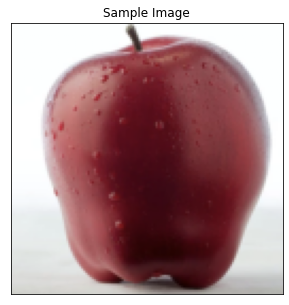

In [72]:
# randomly select an image from training images to display
idx = random.randint(0, len(X_train))
showImage(X_train[idx, :])

## CNN model

This model will be trained by using training dataset and evaluate by using testing(validation) dataset.

### Build custom CNN model

In [77]:
grading_model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid') # use sigmoid since this is a binary class classification
])

In [78]:
# check architecture of the model
grading_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)            

In [79]:
# opt = keras.optimizers.Adam(learning_rate=0.01)
grading_model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# stop training when the validation loss is increasing for five epochs
callback = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                         patience=5, 
                                         restore_best_weights=True)

In [80]:
# train model
history = grading_model.fit(X_train, y_train, epochs=100, batch_size=32,
                           validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/100
451/451 [==============================] - 118s 259ms/step - loss: 0.3921 - accuracy: 0.8004 - val_loss: 0.2435 - val_accuracy: 0.9095
Epoch 2/100
451/451 [==============================] - 99s 220ms/step - loss: 0.1786 - accuracy: 0.9285 - val_loss: 0.1618 - val_accuracy: 0.9293
Epoch 3/100
451/451 [==============================] - 103s 229ms/step - loss: 0.1298 - accuracy: 0.9486 - val_loss: 0.1069 - val_accuracy: 0.9574
Epoch 4/100
451/451 [==============================] - 103s 230ms/step - loss: 0.0977 - accuracy: 0.9615 - val_loss: 0.0736 - val_accuracy: 0.9710
Epoch 5/100
451/451 [==============================] - 99s 218ms/step - loss: 0.0785 - accuracy: 0.9687 - val_loss: 0.0956 - val_accuracy: 0.9663
Epoch 6/100
451/451 [==============================] - 98s 218ms/step - loss: 0.0631 - accuracy: 0.9766 - val_loss: 0.0560 - val_accuracy: 0.9774
Epoch 7/100
451/451 [==============================] - 99s 219ms/step - loss: 0.0590 - accuracy: 0.9788 - val_loss: 0.024

### Model evaluation

451/451 - 20s - loss: 5.9150e-04 - accuracy: 1.0000 - 20s/epoch - 43ms/step
Evaluation result on testing dataset : Loss = 0.0005915035726502538, Accuracy = 1.0


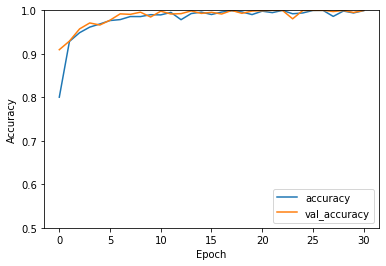

In [81]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = grading_model.evaluate(X_test,  y_test, verbose=2)
print("Evaluation result on testing dataset : Loss = {}, Accuracy = {}".format(test_loss, test_acc))
plt.show()

In [82]:
# save model
grading_model.save('grading_model')

INFO:tensorflow:Assets written to: grading_model\assets


INFO:tensorflow:Assets written to: grading_model\assets


In [83]:
# load model
test_model = keras.models.load_model('grading_model')

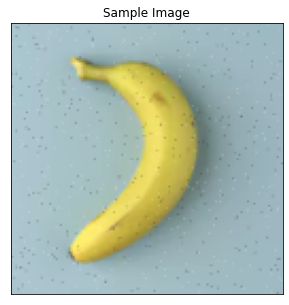

1/1 [==============================] - 0s 19ms/step
Actual condition: fresh
Predicted condition: fresh


In [117]:
# test model with random image
actual = ''
idx2 = random.randint(0, len(y_test))

showImage(X_test[idx2, :])
if (y_test[idx2] == 0):
    actual = 'rotten'
else:
    actual = 'fresh'

y_pred = test_model.predict(X_test[idx2, :].reshape(1, 128, 128, 3))

if(y_pred < 0.5):
    pred = 'rotten'
else:
    pred = 'fresh'

print('Actual condition:', actual)
print('Predicted condition:', pred)